

# jonathan simbana


https://github.com/jonathans2200/IA2



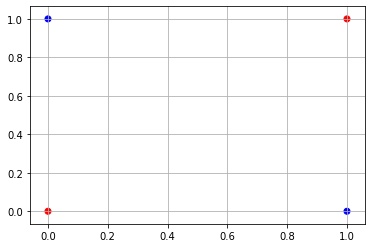

In [4]:
# Importacion de las librerias
import matplotlib.pyplot as pp
import numpy as np

# Creacion de los puntos
X=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
d=np.array([0,1,1,0])

# Dibujo de la grafica
pp.scatter(X[:,0],X[:,1], color=['blue' if i==1 else 'red' for i in d])
pp.grid(True)
pp.show()

### Práctica ANN-0:

Modifique el código anterior, a fin de usar [Hot Encoding](https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science) y contar con 2 salidas en lugar de 1.

In [11]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelBinarizer

In [24]:
# Creamos la matriz de hotencondig
df = pd.DataFrame(list(zip(X, d)), columns=['Puntos', 'Clase'])
df.head()

,Puntos,Clase
0,"[0, 0]",0
1,"[0, 1]",1
2,"[1, 0]",1
3,"[1, 1]",0


In [25]:
y1 = LabelBinarizer().fit_transform(df.Clase)
print(y1)

[[0]
 [1]
 [1]
 [0]]


In [ ]:
# Verificamos la matriz de hotencondig
y = LabelBinarizer().fit_transform(d)

# TODO:
# Modificar las salidas deseadas para representarlas con 2 valores binarios


# Modoficar los parametros de la Red Neuronal. Sustituir None por el valor correspondiente
mlp=MLPClassifier(solver = 'lbfgs', activation='logistic', alpha=1e-4, tol=1e-15, max_iter=10000, \
                  hidden_layer_sizes=(neuronas_capa_oculta, 2))

print(mlp)
# Realizamos el proceso de entrenamiento con la nueva representacion de la salida. 
# Sustituir None por el valor correspondiente:

# TODO:

mlp.fit(x,None)

# Mostramos los pesos entre la entrada y la capa oculta
print('Pesos W^(0): \n:',mlp.coefs_[0])

# Mostramos los pesos entre la capa oculta y la capa de salida
print('\nPesos W^(1): \n:',mlp.coefs_[1])

# Probamos si la red devuelve valores apropiados de acuerdo a las entradas (test):
for entrada in x:
    print('\nPrueba con {','|'.join([str(i) for i in entrada]),'} => ',mlp.predict(entrada.reshape(1,-1)))

### Práctica ANN-1:

Genere 1000 puntos aleatorios con coordenadas $(x_{1}, x_{2})$. Con estos puntos, deberá realizar las siguientes tareas:

* Seleccionar de forma aleatoria 80% de los puntos para entrenar la red y el restante 20% se empleará para probar la red.
* Entrenar la red hasta lograr un error mínimo.
* Probar la red y presentar la matriz de [confusión](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).
* Indicar el nivel de [precisión](https://en.wikipedia.org/wiki/Precision_and_recall) (muestras correctamente clasificadas frente al total de muestras):

$precision=\frac{muestras ~~correctamente ~~clasificadas}{total~~ de~~ muestras}$

In [1]:
## importamos las librerias
import copy
import random

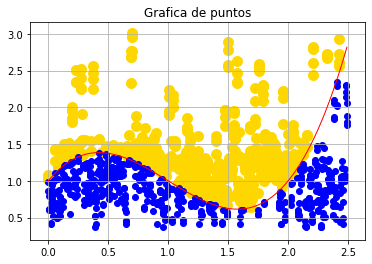

In [7]:
## Agregamos una funcoin  -> x^(3)-3 x^(2)+2 x+1
ecuacion = lambda x :  x**3 - 3*x**2 + 2*x + 1

def dibujar_funcion(rango = [0.0, 2.5], aleatorios = 1000):
    # Genera el rango
    x = np.arange(rango[0], rango[1], 0.01)
    y = ecuacion(x)
    
    # puntos aleatorios
    z = copy.copy(x)
    random.shuffle(z)
    
    index = 0
    puntos_clases = [[],[]]
    salidas_deseadas = []

    for i in range(aleatorios):
        # Agrega el valor randomico
        valor = y[index]
        punto = valor + random.uniform(-0.25, 0.25)
        clase, posicion = (1, 0) if punto >= ecuacion(z[index]) else (0, 1)
        puntos_clases[posicion].append([z[index], punto])
        salidas_deseadas.append(clase)
        # Verifica si ya lelgo al limite
        index += -index if index == len(y) - 1 else 1 
        
    # Prepara los datos  
    salidas_deseadas = np.array(salidas_deseadas)
    puntos_clase1 = np.array(puntos_clases[0])
    puntos_clase2 = np.array(puntos_clases[1])
    
    data = np.vstack((puntos_clase1, puntos_clase2))
    
    pp.scatter(puntos_clase1[:,0], puntos_clase1[:,1], lw = 5.0, color = 'gold')
    pp.scatter(puntos_clase2[:,0], puntos_clase2[:,1], color = 'blue')
    pp.plot(x,y,lw = 1.0, color = 'red')
    pp.title('Grafica de puntos')
    pp.grid(True)
    pp.show()

    return salidas_deseadas, data
    
salidas_deseadas, data = dibujar_funcion()

### Dividimos los datos de entrenamiento y prueba

In [47]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data, salidas_deseadas, test_size = 0.2,\
                                                    stratify = salidas_deseadas)

print('Tamaño X_train: ', X_train.shape)
print('Tamaño X_test: ', X_test.shape)

Tamaño X_train:  (800, 2)
Tamaño X_test:  (200, 2)


### Entrenamos la red

In [53]:
# Importamos el Perceptron Multicapa para Clasificacion
from sklearn.neural_network import MLPClassifier

In [68]:
# Creamos una red neuronal multicapa (Perceptrón)
entradas = 2
neuronas_capa_oculta = 5
neuronas_capa_salida = 1

mlp = MLPClassifier(solver = 'lbfgs', activation = 'logistic', hidden_layer_sizes=(neuronas_capa_oculta, neuronas_capa_salida), \
                   max_iter = 10000, verbose = True)

# Entrenamos la red neuronal (pasándole las entradas y las salidas deseadas)
mlp.fit(data, salidas_deseadas)

# Probamos la red neuronal con las entradas con las que se entrenó
y_pred = mlp.predict(X_test)
presicion = mlp.score(X_test, y_test)
print('La precicion de la RNA: ', presicion)

La precicion de la RNA:  0.51


### Matriz de confusion

In [67]:
from sklearn.metrics import confusion_matrix

In [72]:
confusion_matrix(y_test, y_pred)

array([[  0,  98],
       [  0, 102]], dtype=int64)